# FLINT FOREST MONITORING TOOL

## OLYMPIC NATIONAL PARK

### TABLE OF CONTENT

1. #### INTRODUCTION

2. #### REPOSITORY
   2.0 IMPORT LIBRARIES

3. #### ADMINISTRATIVE
   1.0 BOUNDARY

4. #### ECOLOGICAL ZONE

5. #### BIOCLIMATIC ZONES

4. #### CLIMATE ZONES

---

#### INTRODUCTION

Olympic National Park, nestled in the Pacific Northwest of the United States, stands as a testament to nature's grandeur and diversity. Located in the state of Washington, it encompasses a vast expanse of pristine wilderness, ranging from rugged coastline to lush temperate rainforests and towering mountain peaks.

Spanning nearly one million acres, Olympic National Park is renowned for its ecological richness and unique landscapes. Its boundaries stretch from the rugged Pacific coastline, with its dramatic sea stacks and tide pools, to the lush Hoh Rainforest, one of the few temperate rainforests in the world. Inland, the park is dominated by the majestic Olympic Mountains, including the towering Mount Olympus, the highest peak in the range.

The park's diverse ecosystems support a wealth of wildlife, including Roosevelt elk, black bears, mountain goats, and a variety of bird species. Visitors to Olympic National Park can explore its extensive network of hiking trails, ranging from easy strolls to challenging backcountry treks, offering opportunities to immerse themselves in the unspoiled beauty of nature

#### REPOSITORY
IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import fiona
import requests
import folium

#### ADMINISTRATIVE
BOUNDARY

In [3]:
# Export washington state to access olympic national park
wash_state = gpd.read_file(r"C:\OUTREACHY\Olympic National Park\USA_AL4_Washington_GEZ.json")

In [14]:
#check first 3 rows of the dataframe
wash_state.head(3)

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,USA,US-WA,Washington,Temperate desert,34,TeBWk,4,"POLYGON ((240.34582 49.00011, 240.30941 49.000..."
1,USA,US-WA,Washington,Temperate mountain system,35,TeM,4,"MULTIPOLYGON (((237.14907 46.00174, 237.14375 ..."
2,USA,US-WA,Washington,Temperate oceanic forest,31,TeDo,4,"MULTIPOLYGON (((237.28436 47.09520, 237.28442 ..."


In [15]:
wash_state.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     3 non-null      object  
 1   ISO3166_2   3 non-null      object  
 2   name        3 non-null      object  
 3   gez_name    3 non-null      object  
 4   gez_code    3 non-null      int64   
 5   gez_abbrev  3 non-null      object  
 6   adminlevel  3 non-null      int64   
 7   geometry    3 non-null      geometry
dtypes: geometry(1), int64(2), object(5)
memory usage: 324.0+ bytes


This gives us information on the dataframe which includes; categorical values, numerical values and geometric data.

In [6]:
wash_state.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(78.72222222222221, 0.5, '48°50′N')

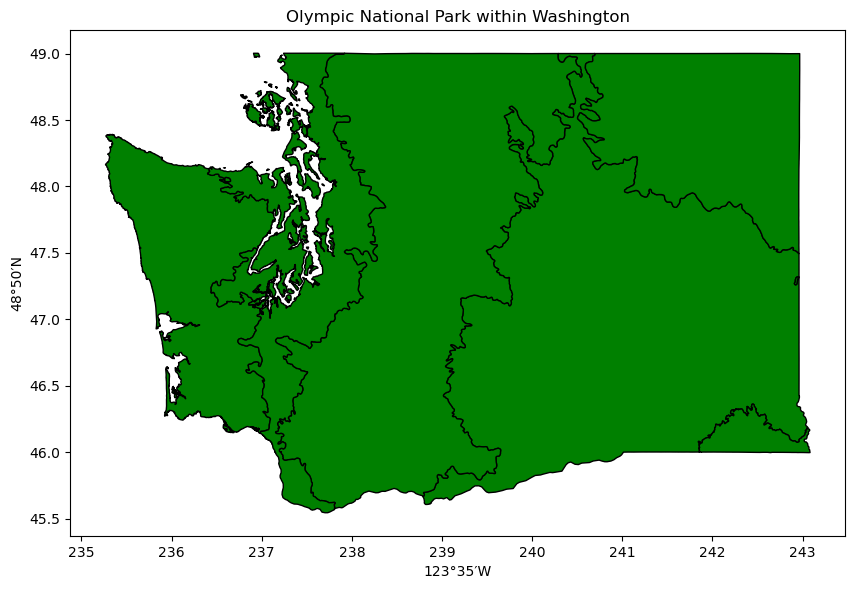

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
wash_state.plot(ax=ax, color='green', edgecolor='black')
plt.title(' Washington Boundary')
plt.xlabel('123°35′W')
plt.ylabel('48°50′N')

In [5]:
oly_state = gpd.read_file(r"c:\OUTREACHY\Olympic National Park\olympic-national-park_536.geojson")

In [22]:
oly_state.head(2)

,UNIT_TYPE,STATE,REGION,UNIT_CODE,UNIT_NAME,DATE_EDIT,GIS_NOTES,CREATED_BY,METADATA,PARKNAME,GNIS_ID,geometry
0,National Park,,PW,OLYM,Olympic,00000000,Shifted 0.06 - 0.07 miles,Legacy,,,,"POLYGON ((-124.06413 47.59871, -124.06406 47.5..."


In [5]:
oly_state.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'Olympic National Park within Washington')

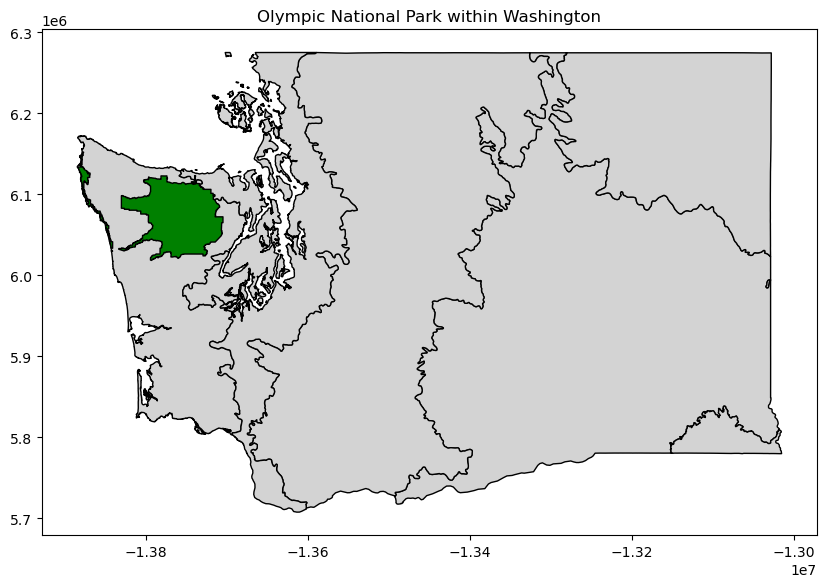

In [6]:

wash_state = wash_state.to_crs("EPSG:3857")
oly_state = oly_state.to_crs("EPSG:3857")
fig, ax = plt.subplots(figsize=(10, 10))
wash_state.plot(ax=ax, color='lightgrey', edgecolor='black')
oly_state.plot(ax=ax, color='green', edgecolor='black', legend = True)
plt.title('Olympic National Park within Washington')


The plot above illustrates the administrative boundary of Olympic National Park in Washington

#### ECOLOGICAL ZONE

In [8]:
wash_eco = gpd.read_file(r"c:\OUTREACHY\Olympic National Park\USA_AL4_Washington_GEZ.json")

In [9]:
# Check if geometries are valid
print("wash_eco is valid:", wash_eco.is_valid)
print("oly_state is valid:", oly_state.is_valid)
#fix invalid geometries
oly_state = oly_state.buffer(0)
# Check if fixing invalid geometries worked
print("wash_eco is valid after fixing:", wash_eco.is_valid)
print("oly_state is valid after fixing:", oly_state.is_valid)
# Clip geometries
oly_eco = wash_eco.clip(oly_state)
oly_eco = oly_eco.reset_index(drop=True)

wash_eco is valid: 0    True
1    True
2    True
dtype: bool
oly_state is valid: 0    False
dtype: bool
wash_eco is valid after fixing: 0    True
1    True
2    True
dtype: bool
oly_state is valid after fixing: 0    True
dtype: bool


c:\Anaconda\Lib\site-packages\geopandas\geodataframe.py:2379: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:3857

  return geopandas.clip(self, mask=mask, keep_geom_type=keep_geom_type)


In [23]:
oly_eco.head(2)

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,USA,US-WA,Washington,Temperate oceanic forest,31,TeDo,4,"MULTIPOLYGON (((-13739959.868 6117672.347, -13..."
1,USA,US-WA,Washington,Temperate mountain system,35,TeM,4,"MULTIPOLYGON (((-13735066.544 6112536.144, -13..."


In [25]:
oly_eco.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     2 non-null      object  
 1   ISO3166_2   2 non-null      object  
 2   name        2 non-null      object  
 3   gez_name    2 non-null      object  
 4   gez_code    2 non-null      int64   
 5   gez_abbrev  2 non-null      object  
 6   adminlevel  2 non-null      int64   
 7   geometry    2 non-null      geometry
dtypes: geometry(1), int64(2), object(5)
memory usage: 260.0+ bytes


This gives us information on the dataframe which includes; categorical values, numerical values and geometric data.

In [26]:
oly_eco.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
# Check for unique value and their counts in the selected column
oly_eco["gez_name"].value_counts()

gez_name
Temperate oceanic forest     1
Temperate mountain system    1
Name: count, dtype: int64

Text(0.5, 1.0, 'Ecoregions in Olympic National Park')

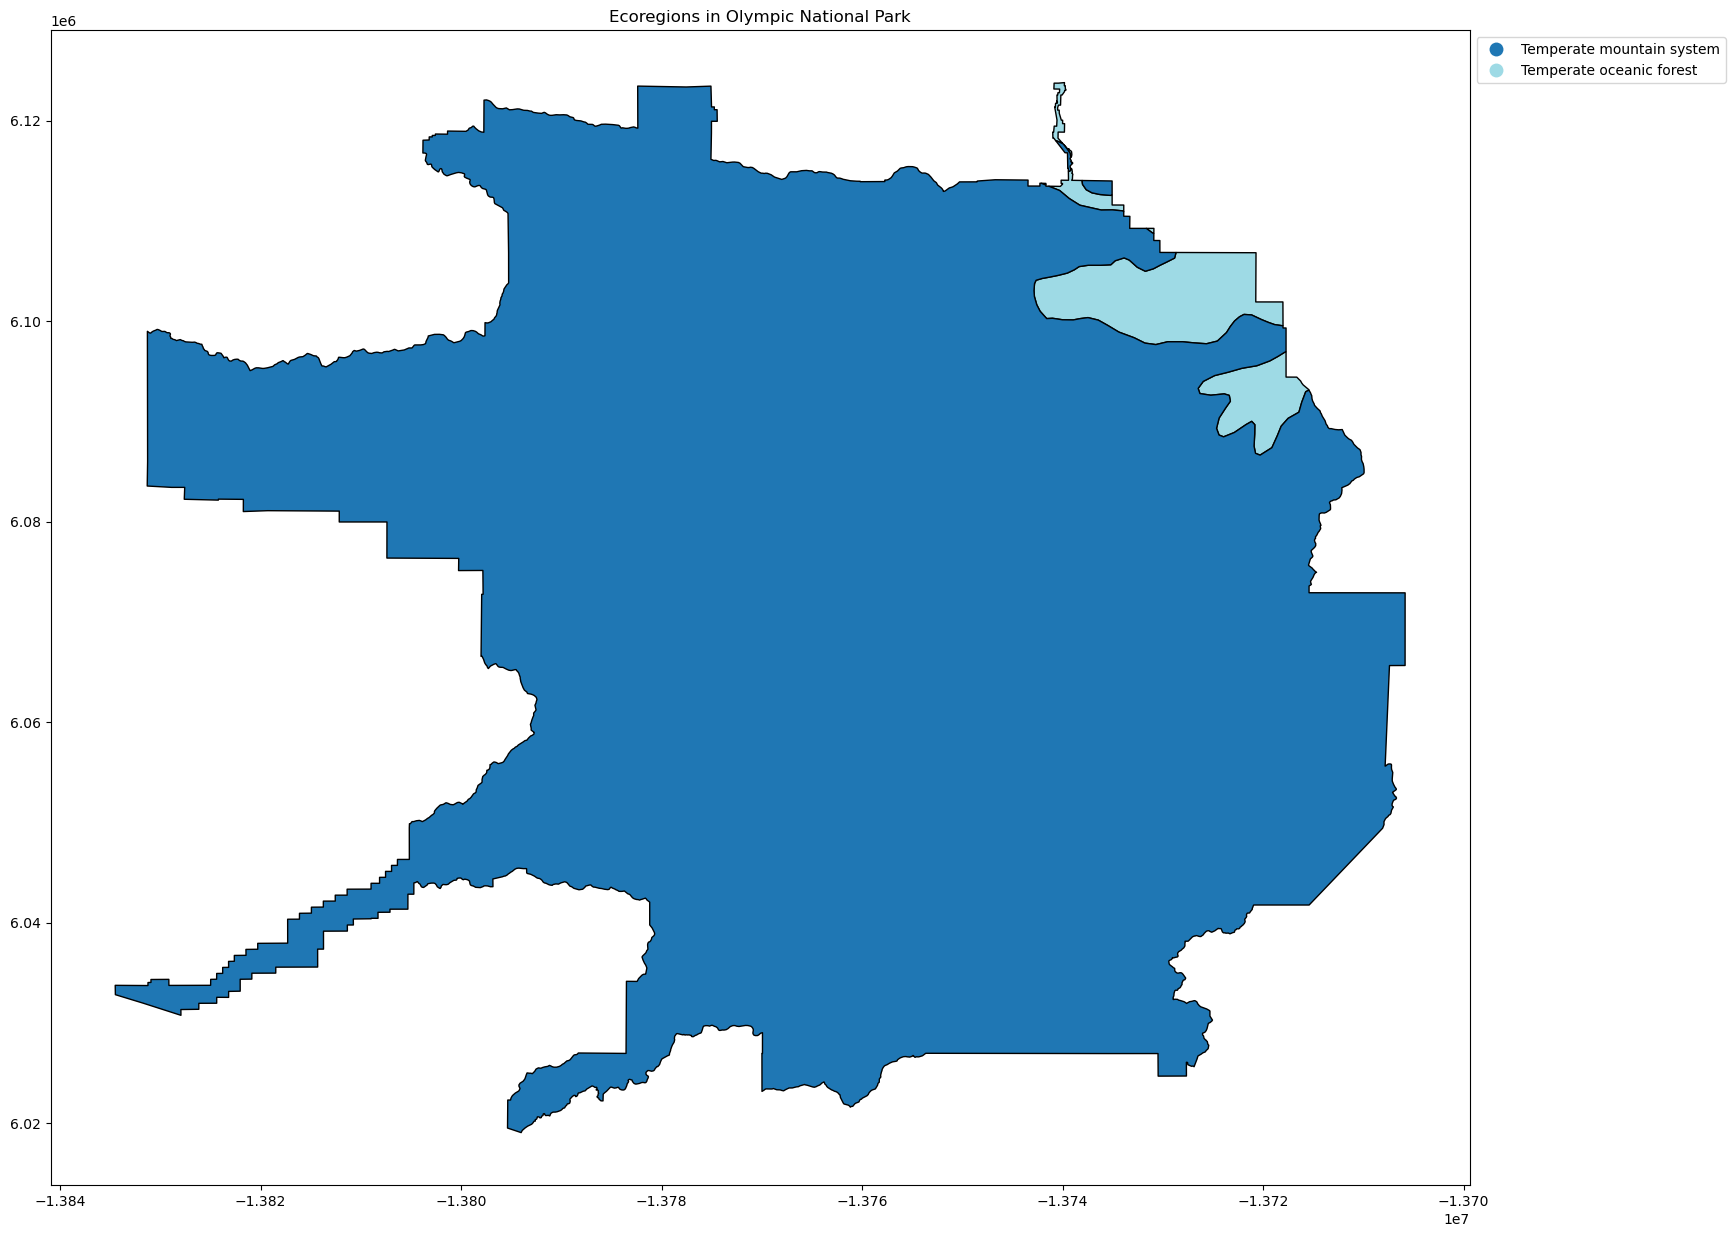

In [28]:
fig, ax = plt.subplots(figsize=(20, 15))
#plot the ecological zones for olympic national park
oly_eco.plot(ax=ax, cmap="tab20", column="gez_name", legend=True,legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("Ecoregions in Olympic National Park")


Olympic National Park has only 2 ecological zones. The Temperature Mountain System is the largest ecological zone while Temperature Oceanic Forest occupies the least

#### BIOCLIMATIC ZONES

In [30]:
# Access biodiversity hotspot from computer
global_biov = gpd.read_file(r"c:\OUTREACHY\Olympic National Park\CI_BiodiversityHotspots (1).geojson")

In [31]:
global_biov.head(2)

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."


In [35]:
# Extract information for Washington biodiversity hotspots
global_biov = global_biov.to_crs("EPSG:3857")
wash_biov = global_biov.clip(wash_state)
wash_biov = wash_biov.reset_index(drop=True)

In [36]:
wash_biov.head(2)

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry


There is no data recorded for the biodiversity hotspots in Washington

#### TERRESTIAL ECOREGIONS

In [37]:
#Access terrestial ecoregions from computer
global_terr = gpd.read_file(r"C:\OUTREACHY\Kenya_SDG\TerrestrialEcoregionsoftheWorld_WWF.geojson")


In [38]:
global_terr.head(2)

,OBJECTID_1,OBJECTID,AREA,ECO_NAME,REALM,BIOME,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,...,G200_BIOME,G200_STAT,area_km2,eco_code,BIOME_1,GBL_STAT_1,REALM_1,Shape_Length,Shape_Area,geometry
0,1,1,29.802942,Northern Mesoamerican Pacific mangroves,NT,14,4,61404,119,1,...,0,0,8174,NT1404,,,Neotropics,0.219475,0.002769,"POLYGON ((-112.30433 29.33480, -112.29035 29.3..."
1,2,2,11.977824,Northern Mesoamerican Pacific mangroves,NT,14,4,61404,119,1,...,0,0,8174,NT1404,,,Neotropics,0.193289,0.001111,"POLYGON ((-112.19639 29.20719, -112.19669 29.2..."


In [40]:
#Extract Washington's terrestial ecoregions
global_terr = global_terr.to_crs("EPSG:3857")
wash_terr = global_terr.clip(wash_state)
wash_terr = wash_terr.reset_index(drop=True)


In [41]:
wash_terr.head(2)

,OBJECTID_1,OBJECTID,AREA,ECO_NAME,REALM,BIOME,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,...,G200_BIOME,G200_STAT,area_km2,eco_code,BIOME_1,GBL_STAT_1,REALM_1,Shape_Length,Shape_Area,geometry
0,7642,7309,55298.620560,Eastern Cascades forests,NA,5,12,50512,89,1,...,0,0,55299,NA0512,,,Nearctic,28.896825,6.111234,"POLYGON ((-13534930.890 5734740.358, -13534862..."
1,7702,7390,14883.022648,Willamette Valley forests,NA,4,17,50417,67,1,...,0,0,14883,NA0417,,,Nearctic,12.142052,1.695061,"POLYGON ((-13676249.387 5781859.902, -13676167..."


In [42]:
#Extract Olympic National Park from Washington terrestial ecoregion
oly_terr = wash_terr.clip(oly_state)
oly_terr = oly_terr.reset_index(drop = True)

In [43]:
oly_terr.head(2)

,OBJECTID_1,OBJECTID,AREA,ECO_NAME,REALM,BIOME,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,...,G200_BIOME,G200_STAT,area_km2,eco_code,BIOME_1,GBL_STAT_1,REALM_1,Shape_Length,Shape_Area,geometry
0,7601,7249,41111.128765,Central Pacific coastal forests,NA,5,10,50510,70,1,...,5,1,73863,NA0510,,,Nearctic,37.012179,4.745757,"MULTIPOLYGON (((-13740638.448 6120467.371, -13..."
1,7618,7266,1527.870410,British Columbia mainland coastal forests,NA,5,6,50506,71,1,...,5,1,137750,NA0506,,,Nearctic,5.393947,0.183415,"POLYGON ((-13734471.568 6109122.847, -13734316..."


In [46]:
#check data frame of each column
oly_terr.dtypes

OBJECTID_1         int64
OBJECTID           int64
AREA             float64
ECO_NAME          object
REALM             object
BIOME              int64
ECO_NUM            int64
ECO_ID             int64
ECO_SYM            int64
GBL_STAT           int64
G200_REGIO        object
G200_NUM           int64
G200_BIOME         int64
G200_STAT          int64
area_km2           int64
eco_code          object
BIOME_1           object
GBL_STAT_1        object
REALM_1           object
Shape_Length     float64
Shape_Area       float64
geometry        geometry
dtype: object

In [47]:
oly_terr["ECO_NAME"].value_counts()

ECO_NAME
Central Pacific coastal forests              1
British Columbia mainland coastal forests    1
Puget lowland forests                        1
Name: count, dtype: int64

In [48]:
#check infotmation about the dataframe
oly_terr.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID_1    3 non-null      int64   
 1   OBJECTID      3 non-null      int64   
 2   AREA          3 non-null      float64 
 3   ECO_NAME      3 non-null      object  
 4   REALM         3 non-null      object  
 5   BIOME         3 non-null      int64   
 6   ECO_NUM       3 non-null      int64   
 7   ECO_ID        3 non-null      int64   
 8   ECO_SYM       3 non-null      int64   
 9   GBL_STAT      3 non-null      int64   
 10  G200_REGIO    3 non-null      object  
 11  G200_NUM      3 non-null      int64   
 12  G200_BIOME    3 non-null      int64   
 13  G200_STAT     3 non-null      int64   
 14  area_km2      3 non-null      int64   
 15  eco_code      3 non-null      object  
 16  BIOME_1       3 non-null      object  
 17  GBL_STAT_1    3 non-null      object  
 18  REALM_

In [49]:
#check coordinate system of the dataframe
oly_terr.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'Olympic National Park Terrestial Ecoregion')

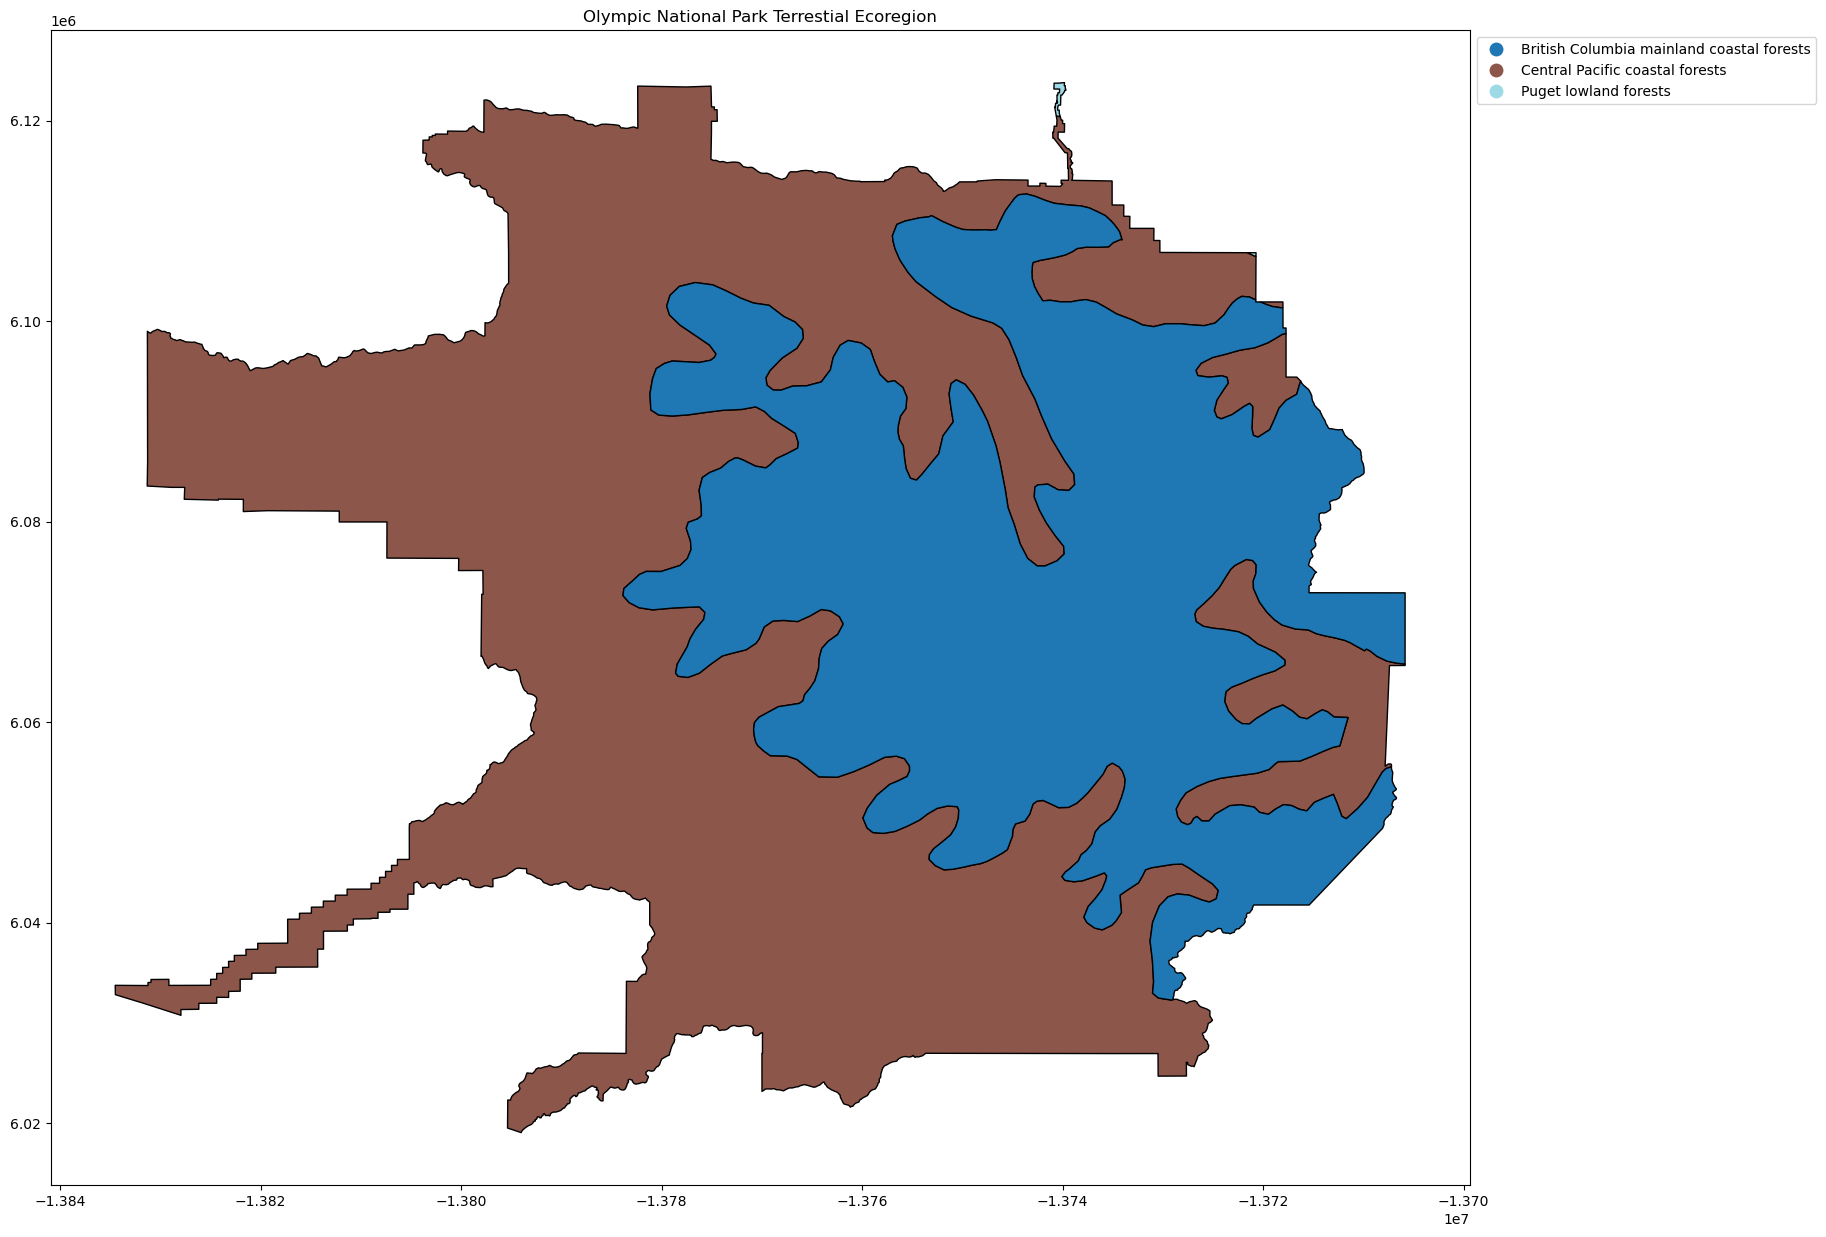

In [45]:
fig, ax = plt.subplots(figsize=(20, 15))
oly_terr.plot(ax=ax, cmap="tab20", column="ECO_NAME", legend=True,legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("Olympic National Park Terrestial Ecoregion")

Olympic national Parkecological landscape comprises two terrestrial ecoregions, with the Central Pacific Coastal Forest emerging as the ecoregion with the widest coverage.This ecoregion alongside Puget Lowland forest play a significant role in shaping Olympic Park biodiversity and ecological dynamics. 

#### CLIMATE

In [10]:
#Access climate dataframe from computer
global_cli = gpd.read_file(r"c:\OUTREACHY\Olympic National Park\IPCC_ClimateZoneMap_Vector.geojson")

In [11]:
global_cli.head(2)

,CLASS_NAME,geometry
0,0,"MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ..."
1,0,"MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ..."


In [12]:
# Check for unique values present in the value column
global_cli["CLASS_NAME"].unique()

array([ 0,  5,  6,  7,  8,  3,  4,  1,  2, 12, 11,  9, 10], dtype=int64)

In [16]:
global_cli.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26165 entries, 0 to 26164
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CLASS_NAME  26165 non-null  int64   
 1   geometry    26165 non-null  geometry
dtypes: geometry(1), int64(1)
memory usage: 409.0 KB


In [13]:
# Fix data and replace numbers with climate zones
zones =  {"0": "Not Defined", "1" : "Warm Temperate Moist", "2" : "Warm Temperate Dry", "3" : "Cool Temperate Moist", "4" : "Cool Temperate Dry", "5" : "Polar Moist",
    "6" : "Polar Dry", "7" : "Boreal Moist", "8" : "Boreal Dry", "9" : "Tropical Montane", "10" : "Tropical Wet", "11" : "Tropical Moist", "12" : "Tropical Dry"}

In [17]:
# Input zones into the data
global_cli.CLASS_NAME = global_cli.CLASS_NAME.astype("str").replace(zones)

In [18]:
global_cli.head(2)

,CLASS_NAME,geometry
0,Not Defined,"MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ..."
1,Not Defined,"MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ..."


In [20]:
# Extract Washington's climate zones zones
global_cli = global_cli.to_crs("EPSG:3857")
wash_cli = global_cli.clip(wash_state)
wash_cli = wash_cli.reset_index(drop=True)

In [21]:
wash_cli.head(2)

,CLASS_NAME,geometry
0,Not Defined,"MULTIPOLYGON (((-13667288.856 6257910.489, -13..."
1,Cool Temperate Moist,"MULTIPOLYGON (((-13686653.550 5796388.797, -13..."


In [30]:
wash_cli["CLASS_NAME"].value_counts()

CLASS_NAME
Not Defined             17
Cool Temperate Moist    16
Warm Temperate Moist    14
Cool Temperate Dry       9
Warm Temperate Dry       5
Boreal Moist             5
Polar Moist              4
Name: count, dtype: int64

Text(0.5, 1.0, 'Washington Climate Zones')

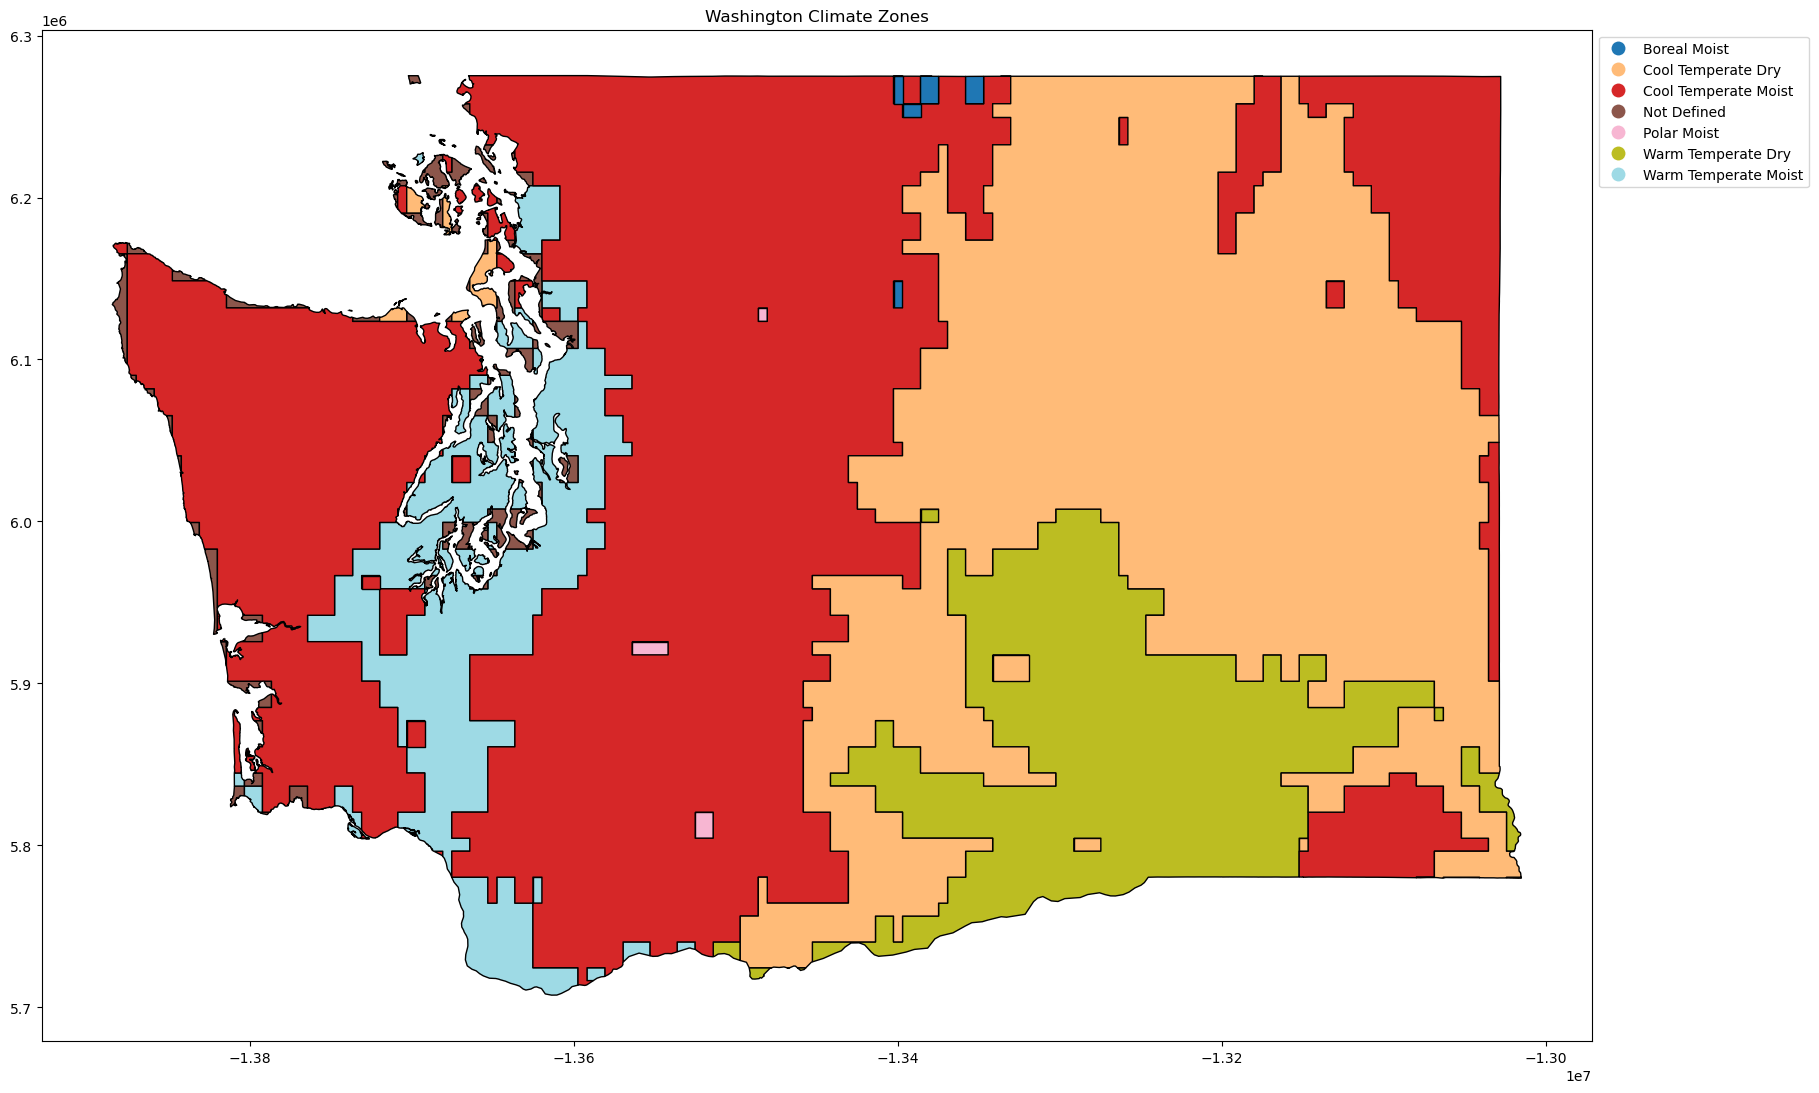

In [31]:
fig, ax = plt.subplots(figsize=(20, 15))
wash_cli.plot(ax=ax, cmap="tab20", column="CLASS_NAME", legend=True,legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax.set_title("Washington Climate Zones")

In Washington, the cool temperate moist climate zone emerges as the most frequently occurring climate zone.

In [23]:
#Extract Olympic National Park climate zones
oly_cli = wash_cli.clip(oly_state)
oly_cli = oly_cli.reset_index(drop=True)

In [24]:
oly_cli.head(2)

,CLASS_NAME,geometry
0,Cool Temperate Moist,"POLYGON ((-13810755.889 6040352.578, -13810748..."


In [25]:
#check dataframe of each column
oly_cli.dtypes

CLASS_NAME      object
geometry      geometry
dtype: object

In [26]:
oly_cli["CLASS_NAME"].value_counts()

CLASS_NAME
Cool Temperate Moist    1
Name: count, dtype: int64

In [27]:
#check coordinate system of the dataframe
oly_cli.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: title={'center': 'Olympic Park Climate Zones within Washington'}>

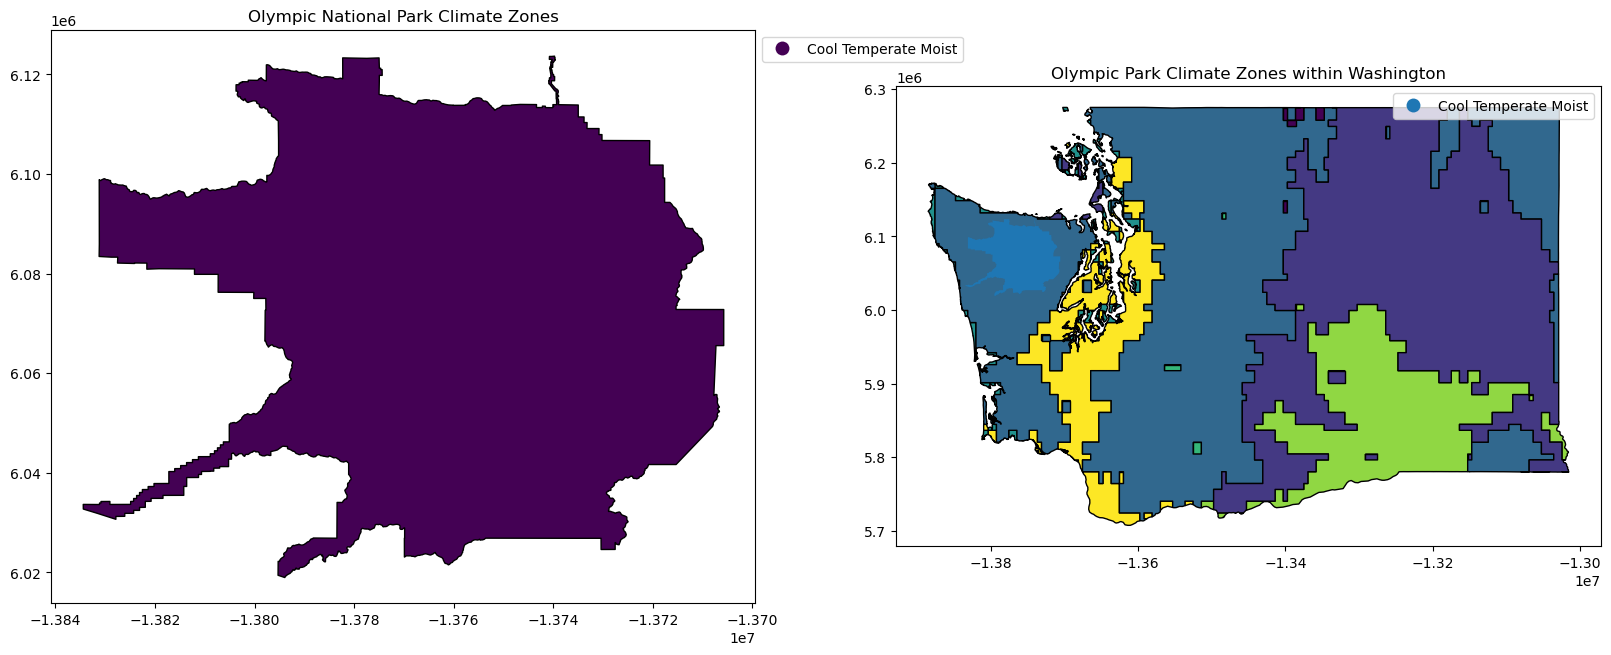

In [45]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
# Plot oly_cli on ax1 with the same colormap as wash_cli
oly_cli.plot(ax=ax1, cmap='viridis', column="CLASS_NAME", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"},edgecolor='black')
ax1.set_title("Olympic National Park Climate Zones")
# Plot wash_cli with the same colormap and include legend
base = wash_cli.plot(ax=ax2, cmap='viridis', edgecolor='black', column="CLASS_NAME", legend=True)
ax2.set_title("Olympic Park Climate Zones within Washington")
# Overlay oly_cli on top of wash_cli
oly_cli.plot(ax=base, column="CLASS_NAME", legend=True)



In Olympic National Park, the cool temperate moist climate zone is the only occurring climate zone.The cool temperate moist climate has a significant prevalence, boasting a broad distribution across the park. 

#### CONCLUSION

From the observations in Olympic National Park:

1. **Climate Zones**: The dominant climate zone within Olympic National Park is the cool temperate moist climate, which is the sole occurring climate zone. This climate type is widely distributed across the park, indicating its significance in shaping the local environment.

2. **Terrestrial Ecoregions**: The ecological landscape of Olympic National Park encompasses two terrestrial ecoregions. The Central Pacific Coastal Forest ecoregion stands out with the most extensive coverage, emphasizing its importance in influencing the biodiversity and ecological dynamics of the park. Additionally, the Puget Lowland forest ecoregion also plays a significant role in shaping the park's ecological makeup.

3. **Ecological Zones**: Olympic National Park comprises only two ecological zones. The Temperature Mountain System represents the largest ecological zone, indicating its dominance over the park's interior regions. In contrast, the Temperature Oceanic Forest occupies a smaller area, suggesting its presence in specific localized habitats within the park.

In summary, the observations underscore the prevalence of the cool temperate moist climate, the significance of the Central Pacific Coastal Forest ecoregion, and the dominance of the Temperature Mountain System ecological zone within Olympic National Park. These factors collectively contribute to the park's unique biodiversity and ecological characteristics.